# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [186]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [138]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [73]:
#data preparation

In [140]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [141]:
df['order_year_month']= pd.to_datetime(df['order_date'], errors='coerce')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56045 non-null  int64         
 1   order_date        55958 non-null  datetime64[ns]
 2   order_year_month  55958 non-null  datetime64[ns]
 3   customer_name     56045 non-null  object        
 4   city              55571 non-null  object        
 5   state_province    55571 non-null  object        
 6   quantity          56006 non-null  float64       
 7   product_name      56045 non-null  object        
 8   product_line      56045 non-null  object        
 9   product_price     56045 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 4.3+ MB


In [77]:
#outlier check and cleanup

In [143]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [144]:
dfclean = df[(df['quantity'] < 100000) & (df['product_price'] < 2000)]

In [145]:
dfclean.describe()


,order_id,quantity,product_price
count,47010.000000,47010.000000,47010.000000
mean,62468.454754,1.616954,329.518517
std,6879.615086,9.283286,402.553807
min,45080.000000,1.000000,2.290000
25%,56595.000000,1.000000,4.990000
50%,62479.500000,1.000000,53.990000
75%,68368.000000,2.000000,609.630000
max,74147.000000,2000.000000,1700.990000


In [81]:
#impute values

In [171]:
dfclean['quantity'] = df['quantity'].fillna(df['quantity'].median())

<ipython-input-171-8e6ceb15d2e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['quantity'] = df['quantity'].fillna(df['quantity'].median())


In [180]:
dfclean = df.dropna()

dfclean['total_amount'] = (df['product_price']*df['quantity'])

dfclean.head()

<ipython-input-180-0961080b8133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['total_amount'] = (df['product_price']*df['quantity'])


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount
0,51188,2021-07-01,2021-07-01,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07-01,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07-02,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07-04,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07-08,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


In [178]:
years_to_exclude = [2421, 2029, 1922]

# Filter out rows with specified years
dfclean = df[~df['order_date'].dt.year.isin(years_to_exclude)]

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [86]:
#create variable

In [87]:
dfclean['complete_customer_info'] = df.apply(lambda row: 1 if all(row[['customer_name', 'city', 'state_province']].notna()) and all(row[['customer_name', 'city', 'state_province']] != '') else 2, axis=1)

<ipython-input-87-f68fe36978d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['complete_customer_info'] = df.apply(lambda row: 1 if all(row[['customer_name', 'city', 'state_province']].notna()) and all(row[['customer_name', 'city', 'state_province']] != '') else 2, axis=1)


In [88]:
complete_count = dfclean['complete_customer_info'].value_counts()

In [160]:
dfclean.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount
0,51188,2021-07-01,2021-07-01,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07-01,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07-02,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07-04,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07-08,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


In [90]:
#create chart

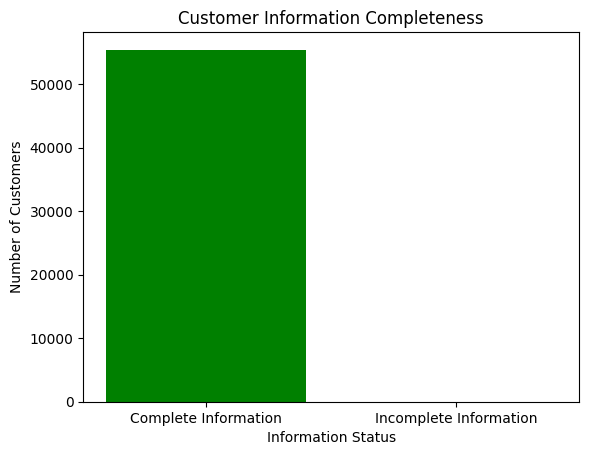

In [167]:
labels = ["Complete Information", "Incomplete Information"]
counts = [complete_count.get(1, 0), complete_count.get(2, 0)]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Customer Information Completeness')
plt.xlabel('Information Status')
plt.ylabel('Number of Customers')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [92]:
#seasonality

In [192]:
dfclean['season'] = dfclean['order_date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall',
})

In [94]:
#revenue over time

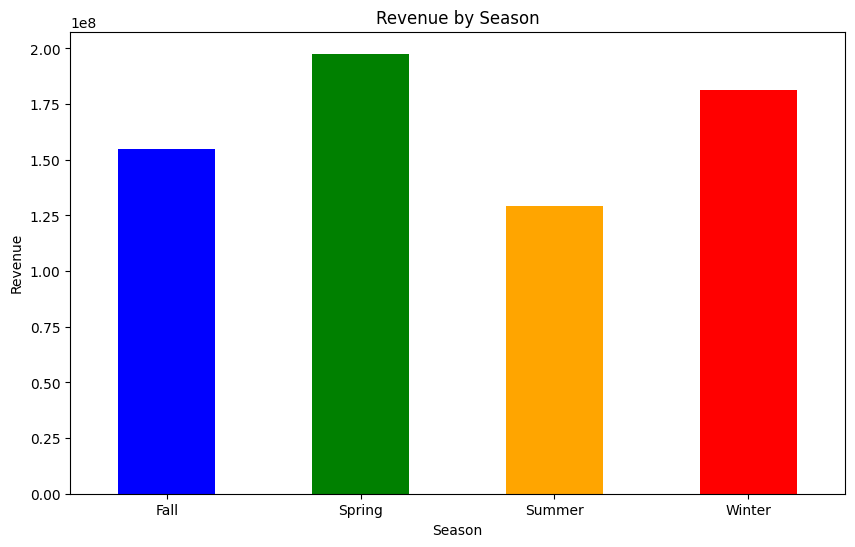

In [176]:
plt.figure(figsize=(10, 6))
dfclean.groupby('season')['total_amount'].sum().plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

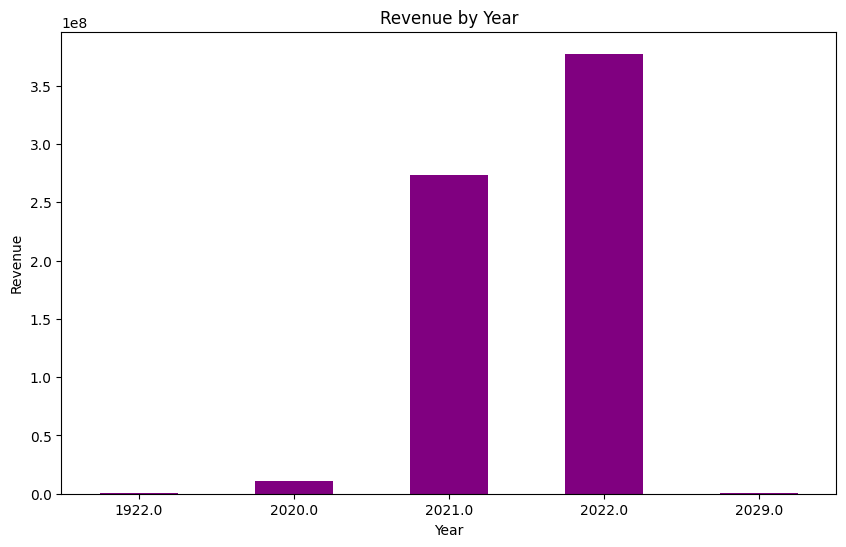

In [181]:
plt.figure(figsize=(10, 6))
dfclean.groupby(df['order_date'].dt.year)['total_amount'].sum().plot(kind='bar', color='purple')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [ ]:
#indoor/outdoor variable

In [182]:
dfclean['product_name']

0        Apple iPhone XR (Yellow, 256 GB) (Includes Ear...
1        Apple iPhone XR (Yellow, 256 GB) (Includes Ear...
2        Apple iPhone XR (Yellow, 256 GB) (Includes Ear...
3        Apple iPhone XR (Yellow, 256 GB) (Includes Ear...
4        Apple iPhone XR (Yellow, 256 GB) (Includes Ear...
                               ...                        
56040    Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...
56041    Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...
56042    Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...
56043    Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...
56044    Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...
Name: product_name, Length: 55445, dtype: object

In [210]:
def categorize_product(product_name):
    indoor_keywords = ['GB', 'Camera', 'Security']
    for keyword in indoor_keywords:
        if keyword in product_name:
            return 'Indoor'
    return 'Outdoor'

In [211]:
dfclean = dfclean.copy()
dfclean['Product_Category'] = dfclean['product_line'].apply(categorize_product)

In [207]:
dfclean['Product_Category']

0        Outdoor
1        Outdoor
2        Outdoor
3        Outdoor
4        Outdoor
          ...   
56040    Outdoor
56041    Outdoor
56042    Outdoor
56043    Outdoor
56044    Outdoor
Name: Product_Category, Length: 56045, dtype: object

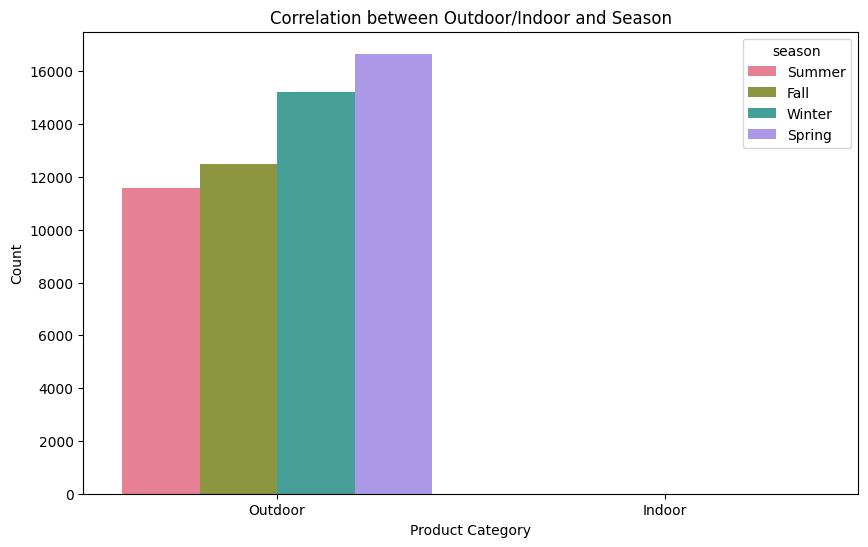

In [206]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', hue='season', data=dfclean, palette='husl', order=['Outdoor', 'Indoor'])
plt.title('Correlation between Outdoor/Indoor and Season')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()